## Student-Score-Analysis using python

### 1. Introduction 
  we aim to accomplish the following for this study:
   1)Is there a correlation between various factors and student scores? 
   2)If so, which factor has the greatest impact on student scores?
  
  This dataset analysis aims to uncover the impact of personal and socio-economic factors on student academic performance, providing actionable insights for targeted recommendations. Our goal is to find useful information that can help schools give better advice and support to improve students' performance. 
    

### 2.  Dataset review and preparation
I have obtained a dataset of student exam scores from Kaggle (https://www.kaggle.com/datasets/desalegngeb/students-exam-scores). The dataset includes three types of student scores such as WritingScore, ReadingScore and MathScore at a public school and the factors such as sports, LunchType, Gender and various other factors that affect these scores.

### 2.1 - Import required libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We will be using pandas for reading, cleaning the dataset and seaborn for visualization.

### 2.1 Step 1 - Read data -> Clean -> Explore

In [21]:
# read the file
df = pd.read_csv("Expanded_data_with_more_features.csv").iloc[:, 1:]
df.head(2)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


There are 14 columns, and 30,000 rows in the dataset. Looking at the data-types, we may need to change datatype of few columns later. The dataset contains scores and the demographic information like gender, maritalStatus etc.

In [23]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


#### Insights
1. NrSiblings - Most students have 2 siblings
2. MathScore - Student has the average score 66 in math.
3. Reading score and Writing Score- student get the average score of 69 and 68 in Reading and Writing respectively.

### 3. Explore with viz

### 3.1 Generating Gender distribution graph

[]

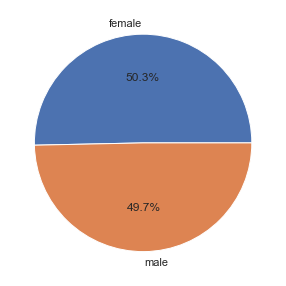

In [24]:
plt.figure(figsize=(5,5))
gender_counts=df["Gender"].value_counts()
sns.set(style="whitegrid")
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.plot()

We have almost equail number of males and females in the dataset.

### 3.2 Parent education vs Student's score

Now we are going to fing the corelation between parent education on student's score. Hypotesis - Parent education is +vely correlated to student score

In [25]:
df["AvgScore"] = (df["MathScore"]+df["ReadingScore"]+df["WritingScore"])/3
df.head(2)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,AvgScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.000000
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,82.333333


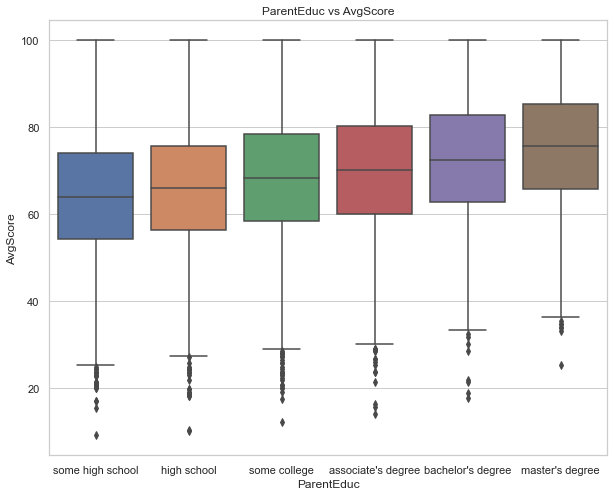

In [26]:
# Calculate the correlation
plt.figure(figsize=(10, 8))
# here we are arranging the oarent education level in ascending order
col_order=["some high school","high school", "some college", "associate's degree" ,"bachelor's degree", "master's degree"]
# box plot

sns.boxplot(x='ParentEduc', y='AvgScore', data=df, order=col_order)

plt.title("ParentEduc vs AvgScore")
plt.show()

#### Insights - there is strong positive corelation between parent's education and student's score.

The analysis reveals a notable correlation between higher parental education levels, particularly when parents hold a master's degree, and elevated academic performance in each subject. Children of parents with master's degrees consistently demonstrate the highest scores across all subjects.

### 3.3 - Heatmap of ParentEduc vs Student Score

In the below code we are going to group parents education by student scores.

In [27]:
# Get avg student scores by education 
score_by_educ = df.groupby('ParentEduc')\
                  .agg({"WritingScore": 'mean', "ReadingScore": 'mean', "MathScore": 'mean'})\
                  .sort_values('MathScore', ascending=False)
score_by_educ

,WritingScore,ReadingScore,MathScore
ParentEduc,,,
master's degree,76.356896,75.832921,72.336134
bachelor's degree,73.331069,73.062020,70.466627
associate's degree,70.299099,71.124324,68.365586
some college,68.501432,69.179708,66.390472
high school,65.421136,67.213997,64.435731
some high school,63.632409,65.510785,62.584013


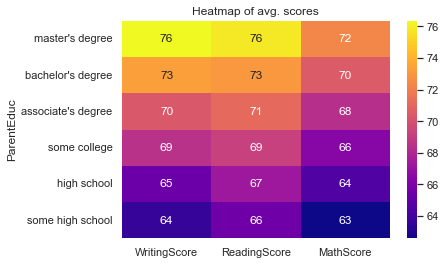

<Figure size 360x360 with 0 Axes>

In [28]:
# using heatmap to show the relation betweeen parents education and scores
sns.heatmap(score_by_educ, annot=True, cmap='plasma')
plt.title("Heatmap of avg. scores")
plt.figure(figsize =(5,5))
plt.show()

The heatmap illustrates the relationship between parent education levels and student scores, where darker colors represent lower scores associated with high school education, and lighter colors indicate higher scores linked to the highest level of parents' education. The visualization provides an at-a-glance overview of how parent education correlates with student performance across different score types.

### 3.4 - LunchType vs AvgScore

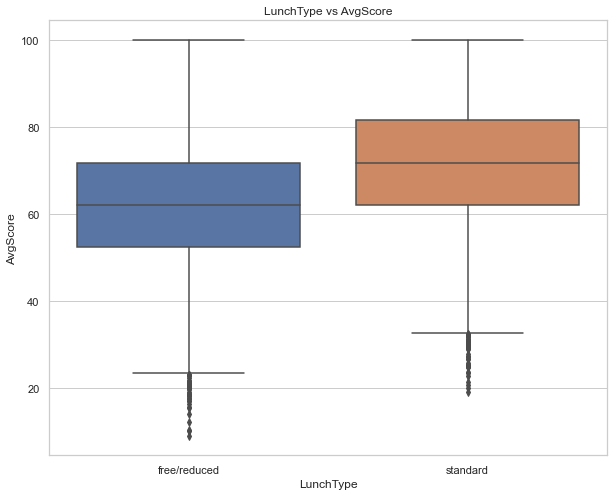

In [29]:
# Calculate the correlation
plt.figure(figsize=(10, 8))
# here we are arranging the oarent education level in ascending order
col_order=["free/reduced","standard"]
# box plot

sns.boxplot(x='LunchType', y='AvgScore', data=df, order=col_order)

plt.title("LunchType vs AvgScore")
plt.show()

#### According to the depicted graph, it is evident that students opting for the standard lunch option have academic scores compared  with students who choose the free/reduced lunch alternative.

### 3.5 - ParentMaritalStatus vs StudentScore

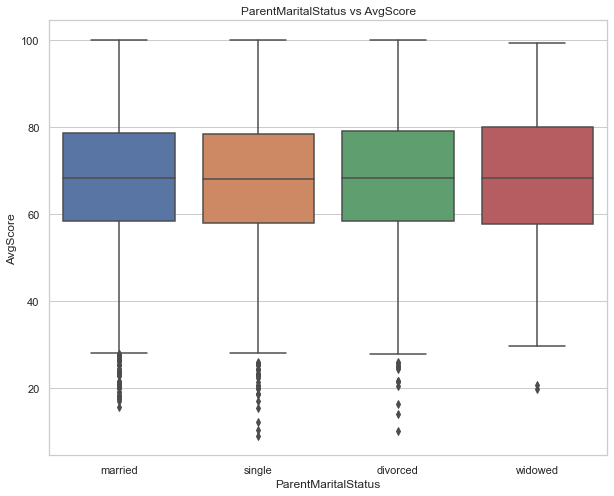

In [30]:
# Calculate the correlation
plt.figure(figsize=(10, 8))
# here we are arranging the oarent education level in ascending order
col_order=["married","single", "divorced", "widowed"]
# box plot

sns.boxplot(x='ParentMaritalStatus', y='AvgScore', data=df, order=col_order)

plt.title("ParentMaritalStatus vs AvgScore")
plt.show()

#### Upon careful examination of the above chart, it becomes apparent that the Parental Marital Status variable has no influence on the academic scores of students. The data suggests that the marital status of parents does not play a significant role in determining or affecting students' academic performance as reflected in the observed scores.

### 3.6 - PracticeSport VS StudentScore

In [31]:
# Hypothesis - students who practice sport regularly have the higest score

In [32]:
sport_df = df.groupby('PracticeSport').agg({
    'WritingScore': 'mean',
    'ReadingScore': 'mean',
    'MathScore': 'mean'
})
sport_df

,WritingScore,ReadingScore,MathScore
PracticeSport,,,
never,66.522727,68.337662,64.171079
regularly,69.604003,69.943019,67.839155
sometimes,68.072438,69.241307,66.274831


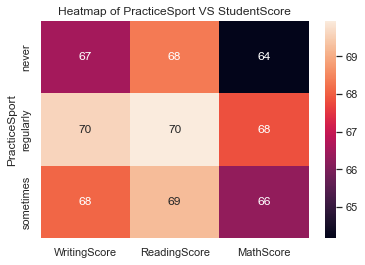

<Figure size 360x360 with 0 Axes>

In [33]:
sns.heatmap(sport_df, annot=True)
plt.title("Heatmap of PracticeSport VS StudentScore")
plt.figure(figsize = (5,5))
plt.show()

#### as we can from both table and heatmap there is not much diffrence of playing sport on regular basis on student scores. but it is higher compared to students who never practice sport.

## 3.7 - Distribution of EthnicGroup

##### In the context of student score analysis, the term "ethnic group" typically refers to the cultural or ancestral background of students, often categorized into distinct groups based on factors such as nationality, race, or cultural heritage. Analyzing student scores by ethnic group allows educational researchers and policymakers to explore potential disparities or patterns in academic performance among different demographic groups.

In [34]:
print(df['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


([<matplotlib.patches.Wedge object at 0x000002CFD1E66520>, <matplotlib.patches.Wedge object at 0x000002CFD1E66430>, <matplotlib.patches.Wedge object at 0x000002CFD1E74250>, <matplotlib.patches.Wedge object at 0x000002CFD1E748E0>, <matplotlib.patches.Wedge object at 0x000002CFD1E74F70>], [Text(1.0679343162184989, 0.26365943230411354, 'Group A'), Text(0.479656756487504, 0.989913832591447, 'Group B'), Text(-1.0208489310562472, 0.40971631644507106, 'Group C'), Text(-0.14172979830625182, -1.09083118046381, 'Group D'), Text(0.9948566425203025, -0.4693189329584214, 'Group E')], [Text(0.582509627028272, 0.14381423580224373, '8%'), Text(0.26163095808409303, 0.5399529995953347, '20%'), Text(-0.5568266896670439, 0.2234816271518569, '32%'), Text(-0.07730716271250097, -0.5949988257075327, '26%'), Text(0.5426490777383467, -0.255992145250048, '14%')])


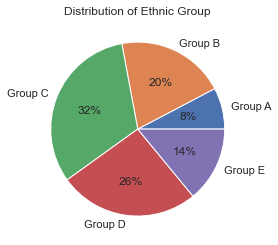

In [35]:
group_a = df.loc[(df['EthnicGroup'] == "group A")].count()
group_b = df.loc[(df['EthnicGroup'] == "group B")].count()
group_c = df.loc[(df['EthnicGroup'] == "group C")].count()
group_d = df.loc[(df['EthnicGroup'] == "group D")].count()
group_e = df.loc[(df['EthnicGroup'] == "group E")].count()

ethnicgroup_list = [group_a["EthnicGroup"],group_b["EthnicGroup"],group_c["EthnicGroup"],group_d["EthnicGroup"],group_e["EthnicGroup"]]
pie_percent = plt.pie(ethnicgroup_list , labels = ['Group A','Group B','Group C', 'Group D', 'Group E'], autopct= "%.f%%")
print(pie_percent)
plt.title("Distribution of Ethnic Group")
plt.show()